# Hello, _nbpresent_!

In [ ]:
import nbpresent
nbpresent.__version__

Often, when I work with ocean color remote sensing data, the results of my analyses are better put in context with mapping of the data. So far I have always relied on [SeaDAS](https://seadas.gsfc.nasa.gov/) (also [available on github](https://github.com/seadas/seadas.git)). However I find that automating data mapping is difficult and I'm left to fumble to find back the settings (color map, color scale, colorbar settings, etc) I used in a previous sessions so the plots can be somehow relatable. This post is my first at attempting this concern by using a new package called [GeoViews](https://www.continuum.io/blog/developer-blog/introducing-geoviews) designed for visualization of earth science data. Without further ado, let's import the necessary packages and get on with it...

In [1]:
# I Like big cells which results in large figures
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [3]:
import numpy as np
import xarray as xr
import holoviews as hv
import geoviews as gv
from geoviews import feature as gf
from cartopy import crs
import netCDF4 as nc
import os
from holoviews import Store, Options
from matplotlib import rcParams

In [5]:
rcParams['axes.formatter.limits']=[-2,3]
rcParams['font.size'] = 16

In [6]:
hv.notebook_extension('matplotlib')

In [18]:
%opts Image {+framewise} [colorbar=True, ] style(cmap='viridis') Overlay [fig_size=800]

First I am going to load a data sets then set it up so that

In [ ]:

dataDir = '/accounts/ekarakoy/disk02/UNCERTAINTIES/Monte-Carlo/DATA/AncillaryMC/'
expDir = 'Lt'
fname = 'S20031932003196.L3m_4D_SU50.nc'
fpath = os.path.join(dataDir,expDir,fname)

Notice that I'm loading an **L3m**, i.e. mapped file. This format is readily available through the [Ocean Biology Processing Group's L3 level download page](https://oceancolor.gsfc.nasa.gov/cgi/l3). Just be sure to select to click on the small "SMI" icon embedded in the thumbnails.

In [9]:
ensemble = xr.open_dataset(fpath)

In [10]:
dataset = gv.Dataset(ensemble, crs=crs.PlateCarree(),kdims=['lon','lat'],
                     vdims=['Rrs_unc_412', 'Rrs_unc_490', 'Rrs_unc_555'])

In [11]:
print(dataset.range('Rrs_unc_412'))
print(dataset.range('Rrs_unc_490'))
print(dataset.range('Rrs_unc_555'))

(7.400087110909226e-05, 0.005442000857556195)
(3.6000871205033036e-05, 0.003720000861903827)
(2.8000871225231094e-05, 0.002854000864090267)


In [16]:
rrs412 = dataset.redim(Rrs_unc_412=dict(range=(7.5e-5,4e-4))).to(gv.Image,['lon','lat'],['Rrs_unc_412']) *\
         gf.coastline(style=dict(edgecolor='white')) *\
         gf.land(style=dict(facecolor='black'))

:Overlay
   .Image.I     :Image   [lon,lat]   (Rrs_unc_412)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
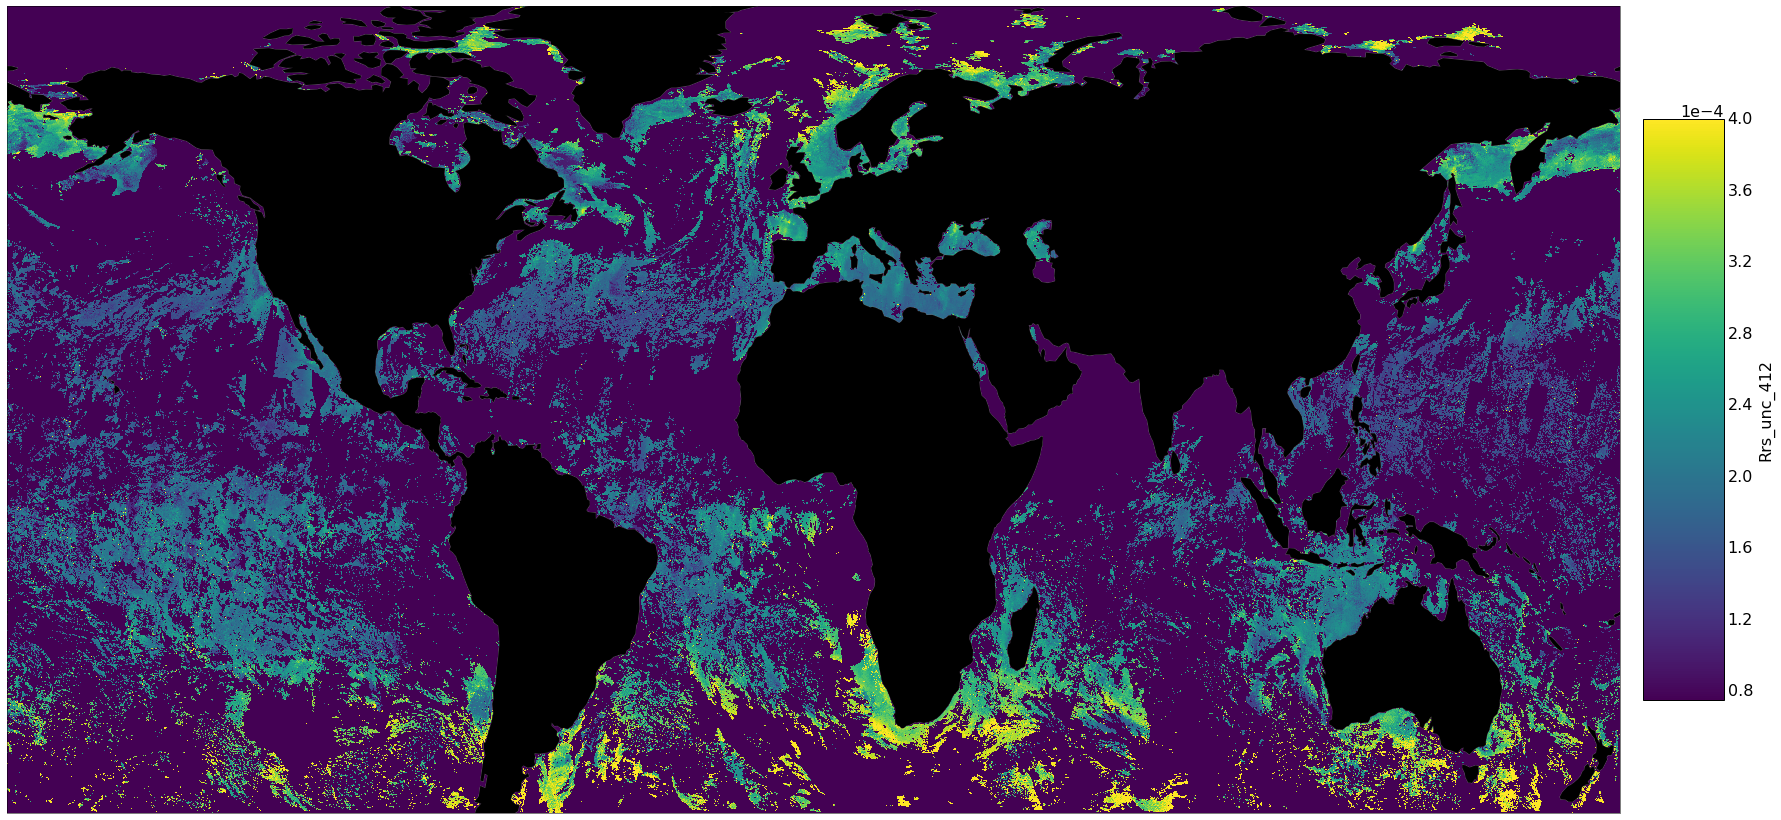

In [19]:
%%output filename='rrs_unc_412' fig='png'
rrs412